# OC_P2 Data Exploration

Bienvenue dans le notebook d'exploration de données du projet "Concevez une application au service de la santé publique.

# Sommaire
- <a href="#C1">I. Analyse Univariée</a>
    - 1. Distribution des variables quantitatives
    - 2. Distribution des variables qualitatives
- <a href="#C2">II Analyse Bivariée</a>
    - 1. Correlation entre les variables
    - 2. ???
    - 3. ???

In [47]:
# importing librairies
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), r'C:\Users\omira\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)

# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
text_kwargs = dict(ha='center', va='center', fontsize=14, color='white')

# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# set dark background
plt.style.use("dark_background")

In [49]:
# chargement du dataframe
df = pd.read_csv('food_cleaned_final.csv', low_memory=False)

In [34]:
df

,code,nutrition_grade_fr,ingredients_from_palm_oil_categ,additives_categ,nutrition-score-uk_100g,energy_100g,fiber_100g,proteins_100g,carbohydrates_100g,sodium_100g,saturated-fat_100g,fat_100g,sugars_100g
0,0000000003087,d,no/low palm oil,no/very low additives,9.0,1100.0,1.5,4.76,20.60,0.229,1.79,5.00,5.71
1,0000000004530,d,no/low palm oil,no additives,14.0,2243.0,3.6,3.57,64.29,0.000,28.57,28.57,14.29
2,0000000004559,b,no/low palm oil,no additives,0.0,1941.0,7.1,17.86,60.71,0.250,0.00,17.86,17.86
3,0000000016087,d,no/low palm oil,no additives,12.0,2540.0,7.1,17.86,17.86,0.482,5.36,57.14,3.57
4,0000000016094,d,no/low palm oil,no additives,9.0,1552.0,5.7,8.57,77.14,0.229,1.79,1.43,5.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320536,9948282780603,d,no/low palm oil,no/very low additives,9.0,1100.0,1.5,4.76,20.60,0.229,1.79,5.00,5.71
320537,99567453,b,no/low palm oil,no additives,0.0,0.0,0.0,0.00,0.00,0.000,0.00,0.00,0.00
320538,9970229501521,d,no/low palm oil,no/very low additives,9.0,1100.0,1.5,4.76,20.60,0.229,1.79,5.00,5.71
320539,9980282863788,d,no/low palm oil,no/very low additives,9.0,1100.0,1.5,4.76,20.60,0.229,1.79,5.00,5.71


In [50]:
df.describe()

,nutrition-score-uk_100g,energy_100g,fiber_100g,proteins_100g,carbohydrates_100g,sodium_100g,saturated-fat_100g,fat_100g,sugars_100g
count,320541.000000,320541.000000,320541.000000,320541.000000,320541.000000,320541.000000,320541.000000,320541.000000,320541.000000
mean,9.432924,1119.318746,2.334113,6.638670,29.303911,0.558271,4.175920,10.869426,13.556196
std,6.994005,718.133931,3.684155,7.394534,25.867630,2.323351,6.854719,15.601633,19.005884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,502.000000,0.800000,1.600000,9.600000,0.047244,0.300000,0.900000,2.500000
50%,9.000000,1100.000000,1.500000,4.760000,20.600000,0.229000,1.790000,5.000000,5.710000
75%,13.000000,1569.000000,2.300000,8.240000,50.000000,0.439000,4.500000,14.290000,14.840000
max,37.000000,4000.000000,100.000000,100.000000,164.000000,49.212598,100.000000,105.000000,134.000000


# I. Analyse Univariee

1. Distribution des variables quantitatives

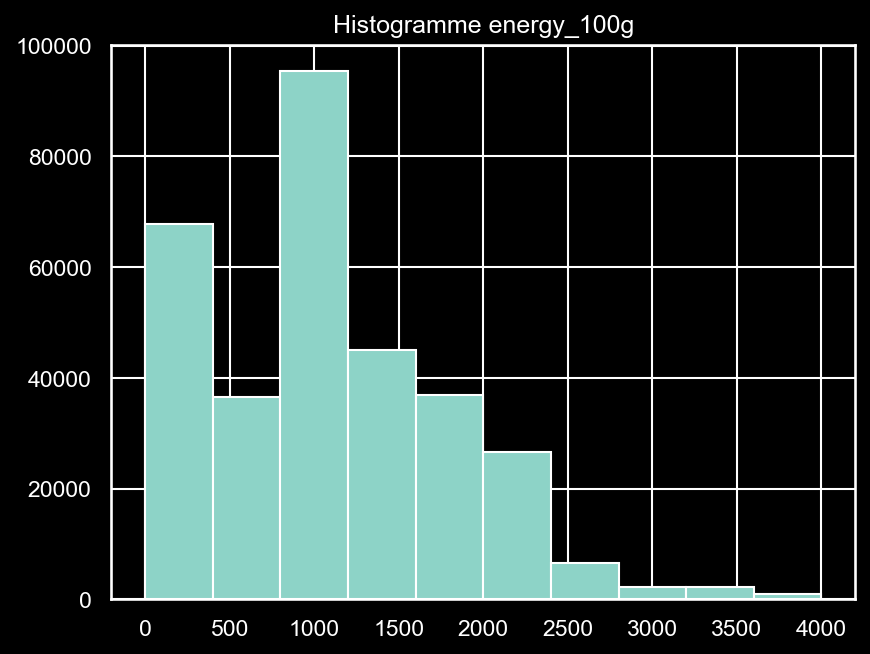

energy_100g


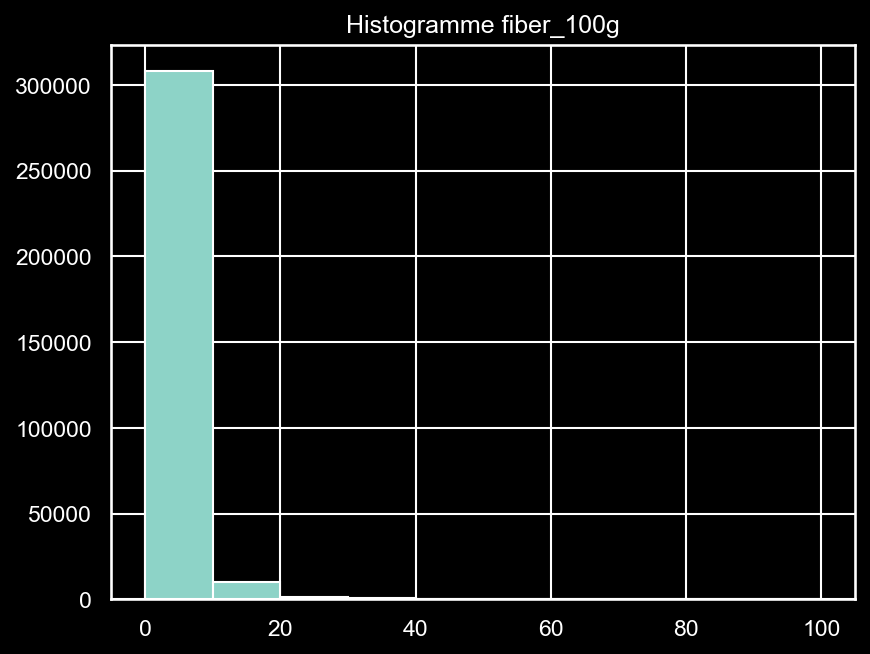

fiber_100g


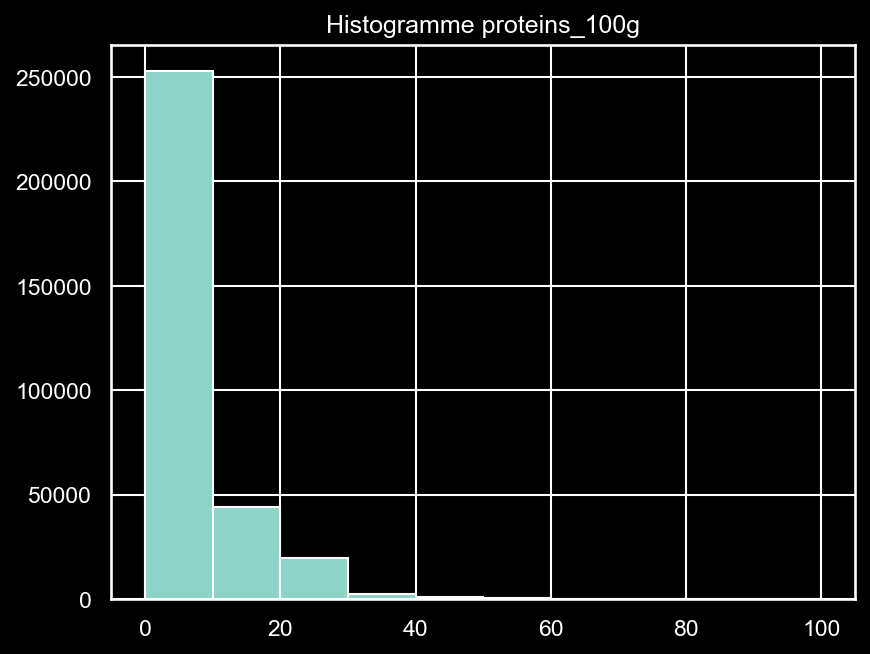

proteins_100g


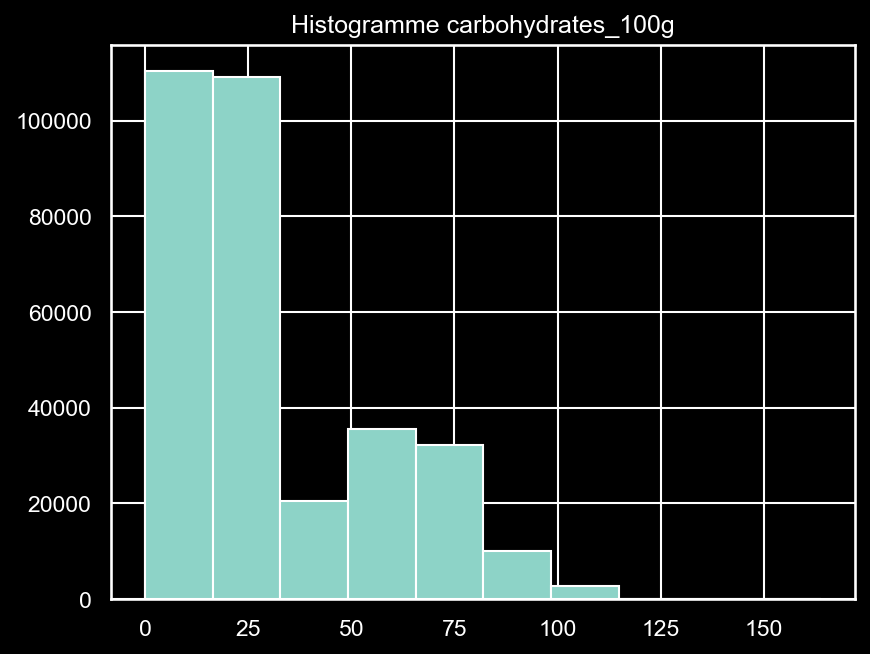

carbohydrates_100g


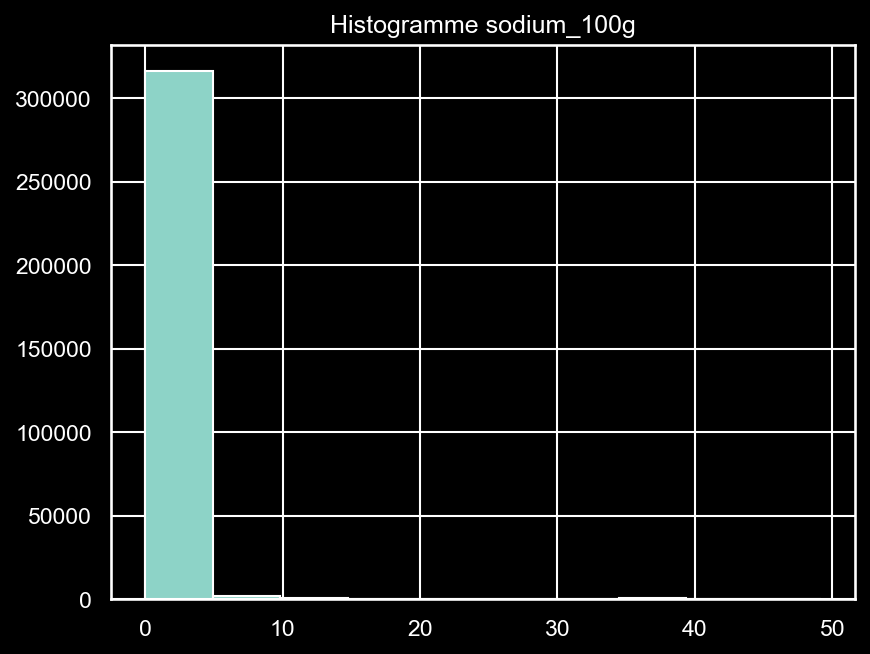

sodium_100g


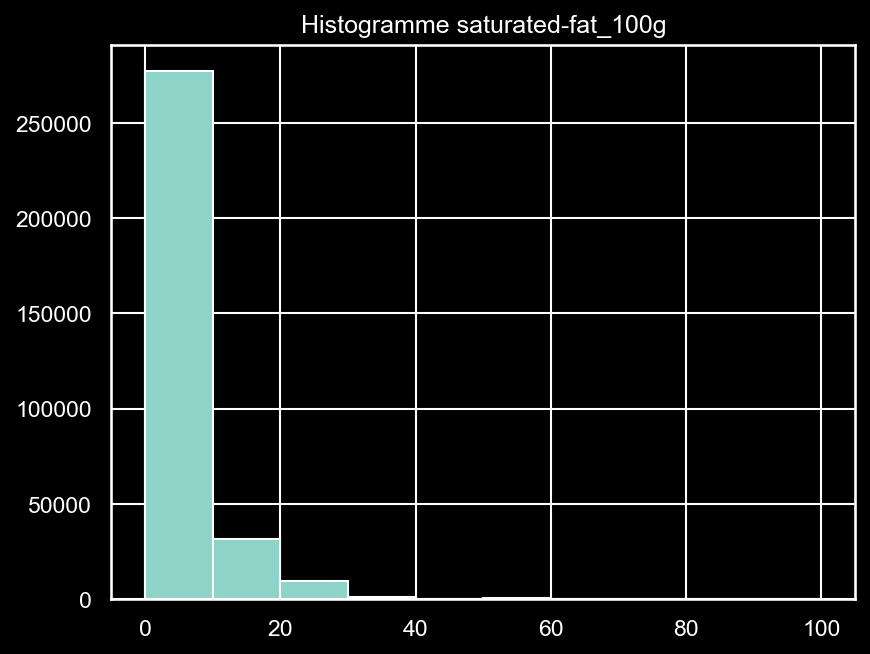

saturated-fat_100g


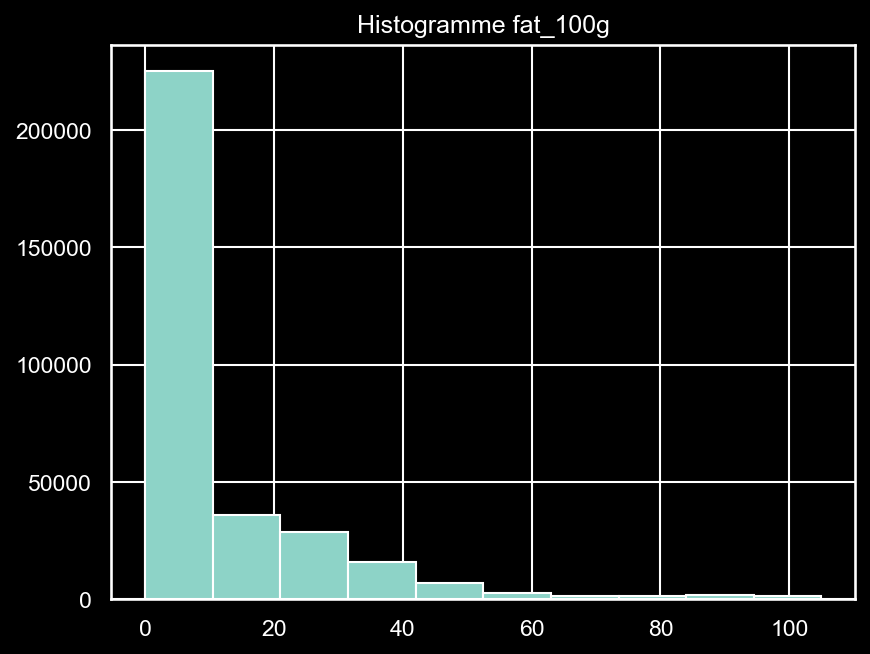

fat_100g


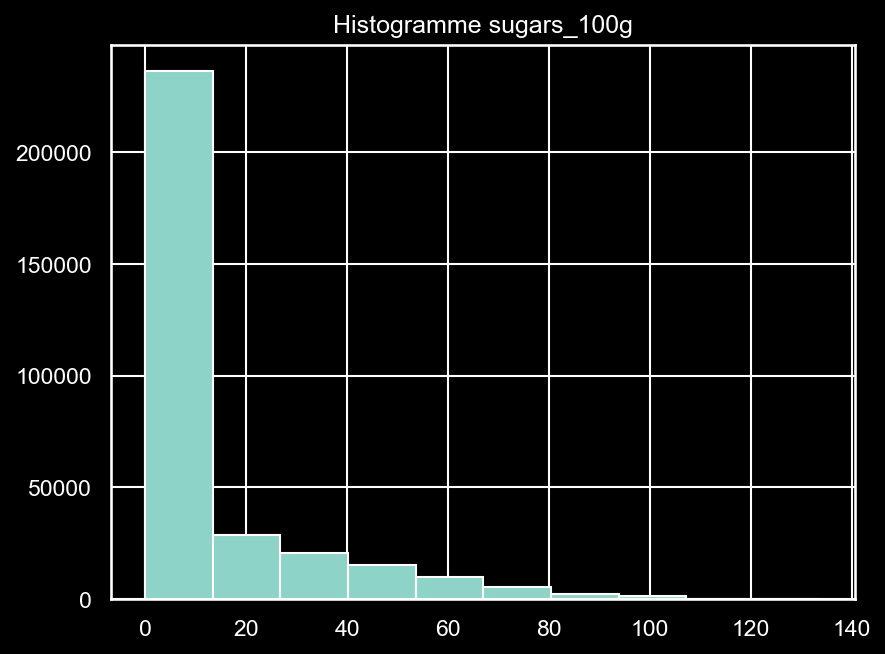

sugars_100g


In [51]:
# on vérifie que la distribution des variables est correcte
list_columns = ['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']

for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    plt.hist(df[columns_name])
    plt.show()
    print(columns_name)

In [52]:
# on récupère que les variables quantitatives pour tracer des boites à moustache
df_quanti = df[['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']]

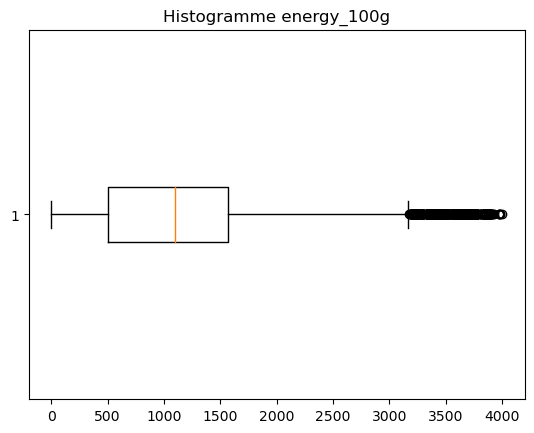

energy_100g


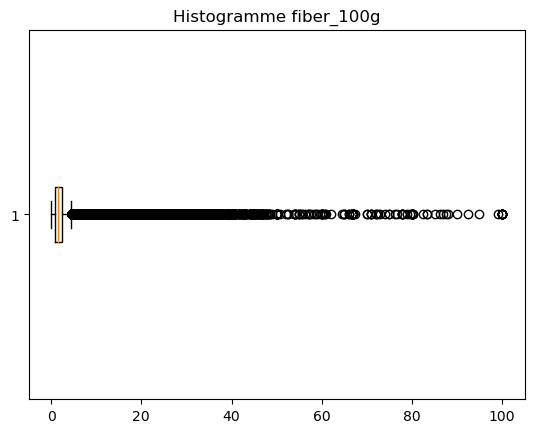

fiber_100g


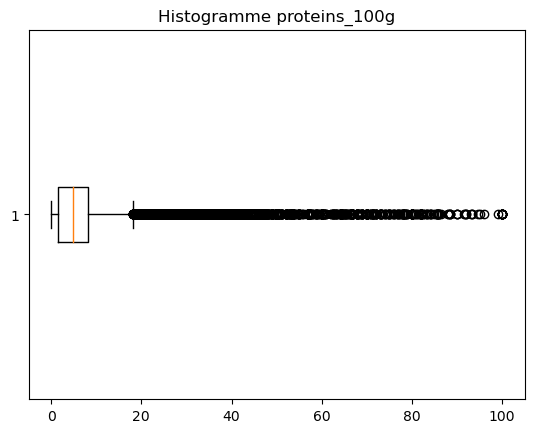

proteins_100g


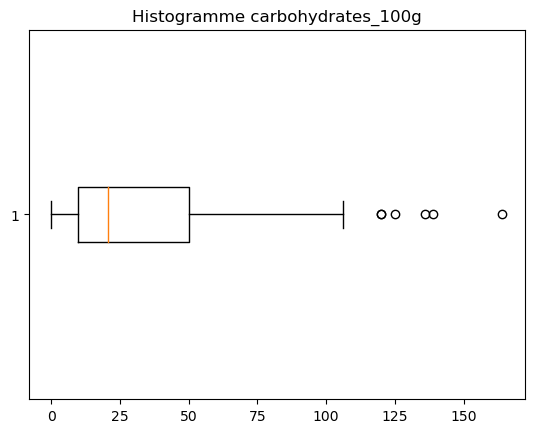

carbohydrates_100g


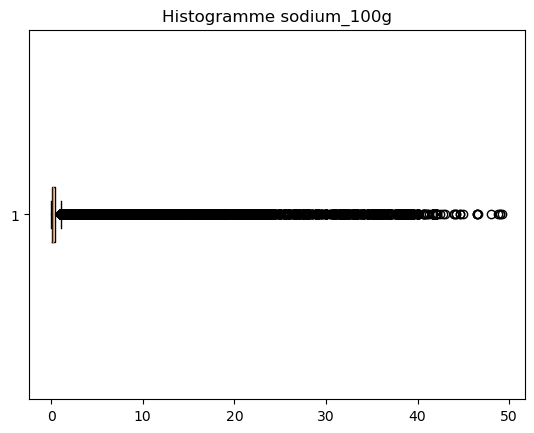

sodium_100g


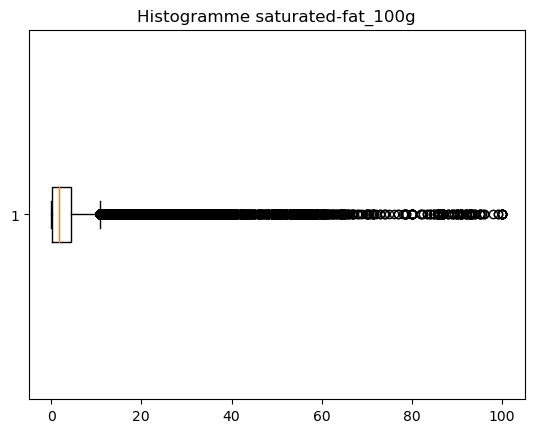

saturated-fat_100g


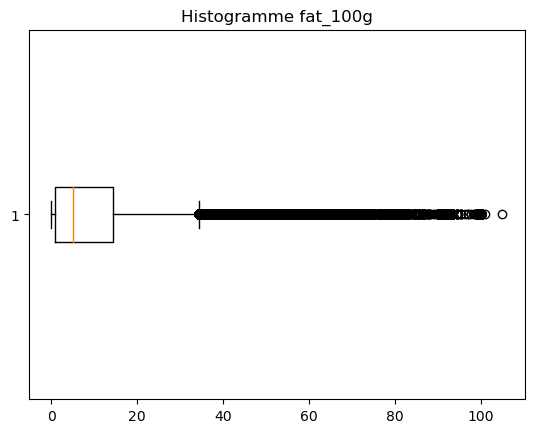

fat_100g


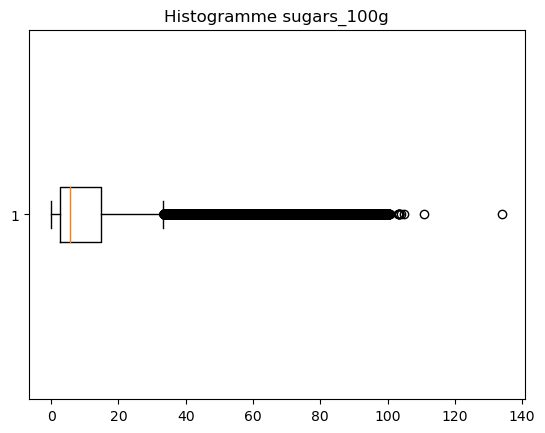

sugars_100g


In [53]:
# on représente la distribution des variables avec un boxplot
list_columns = ['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']
plt.style.use("default")
for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    plt.boxplot(df[columns_name], vert=False)
    plt.show()
    print(columns_name)

2. Distribution des variables qualitatives

In [54]:
# pour les variables qualitatives, on affiche un diagramme pour voir leur fréquence, pour cela on va
# commencer à les récuperer dans un nouveau dataframe
df_quali = df[['nutrition_grade_fr','ingredients_from_palm_oil_categ','additives_categ']]

rajouter des titres, axes

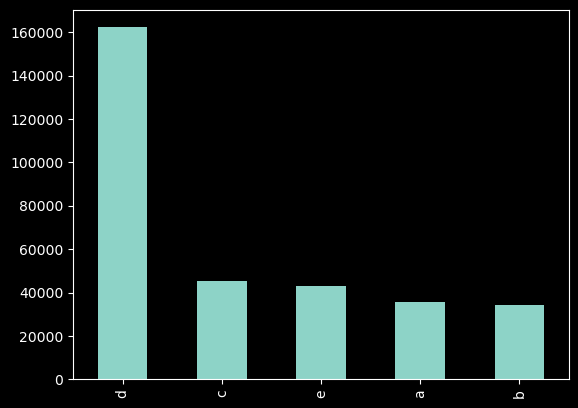

In [55]:
plt.style.use("dark_background")
df['nutrition_grade_fr'].value_counts().plot(kind='bar')
plt.show()

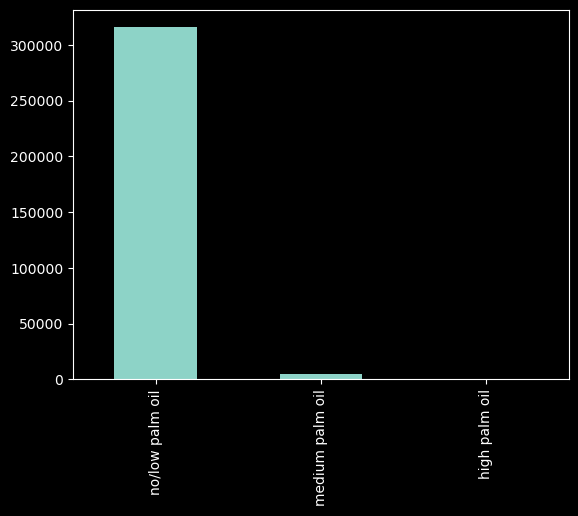

In [56]:
plt.style.use("dark_background")
df['ingredients_from_palm_oil_categ'].value_counts().plot(kind='bar')
plt.show()

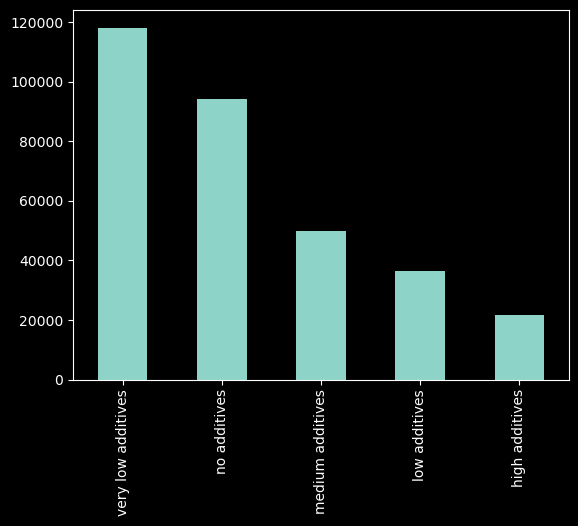

In [57]:
plt.style.use("dark_background")
df['additives_categ'].value_counts().plot(kind='bar')
plt.show()

# II. Analyse Bivariée

In [31]:
# calcul du coefficient de pearson
correlation_matrix = df.corr()
pearson_corr, p_value = pearsonr(df['proteins_100g'], df['fat_100g'])
pearson_corr

# on voit donc qu'il y a une relation linéaire positive faible entre les deux variables

0.23598804384216296

In [29]:
# calcul du coefficient de pearson, méthode 2
print(st.pearsonr(df["proteins_100g"],df["fat_100g"])[0])

0.23598804384216296


In [27]:
# calcul de la covariance
# la covariance est positive, il existe donc une relation linéaire positive entre les deux variables,
# ce qui signifie que lorsque l'une des deux variable augmente, la valeur de l'autre variable augmente
# également.
print(np.cov(df["proteins_100g"],df["fat_100g"],ddof=0)[1,0])

27.225101960539273


<AxesSubplot:>

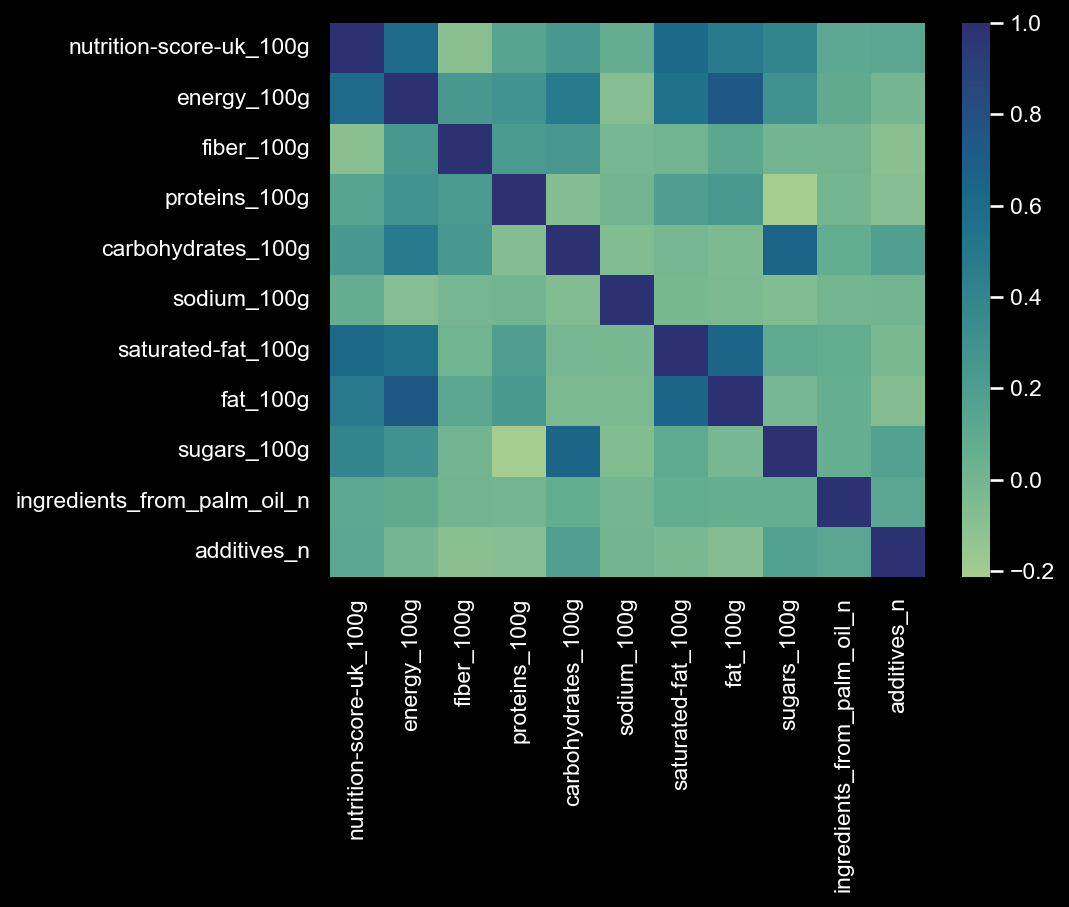

In [35]:
# afin d'automatiser le traitement pour chaque variables, on affiche la matrice des corrélation avec une heatmap
# on voit que : énergie et gras sont corrélés, ainsi que le sucre avec les lipides
# en revanche le sucre et la protéine ne sont pas corréllés
# on voit également que les facteurs corréllés au nutriscore anglais sont : les calories, les graisses
# et le sucre.

sns.heatmap(df.corr(),cmap='crest')

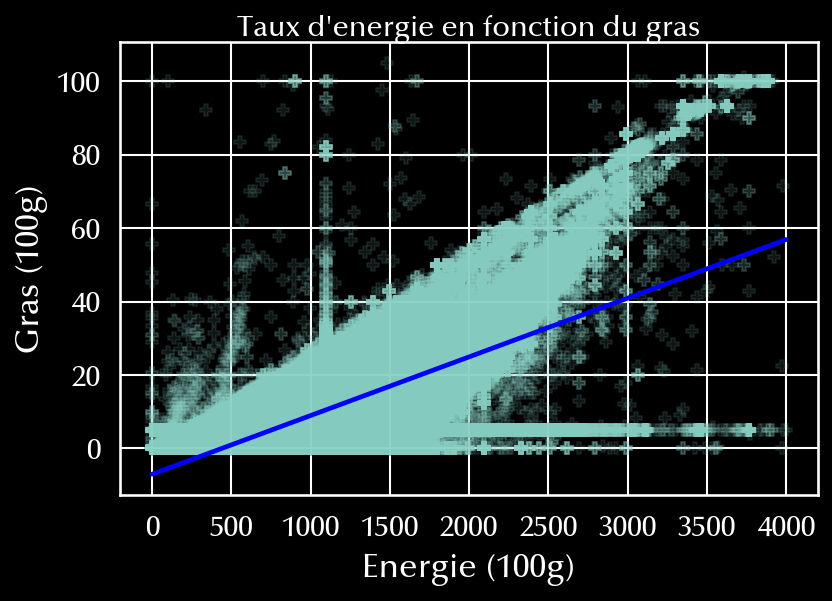

In [93]:
plt.title("Taux d'energie en fonction du gras", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)

ax = sns.regplot(x="energy_100g", y="fat_100g", data=df, line_kws={"color":"blue"},scatter_kws={"alpha":0.1}, marker='P', )
plt.xlabel("Energie (100g)", fontproperties=prop, size = 16)
plt.ylabel("Gras (100g)", fontproperties=prop, size = 16)
# ax.yaxis.labelpad = 200

plt.show()

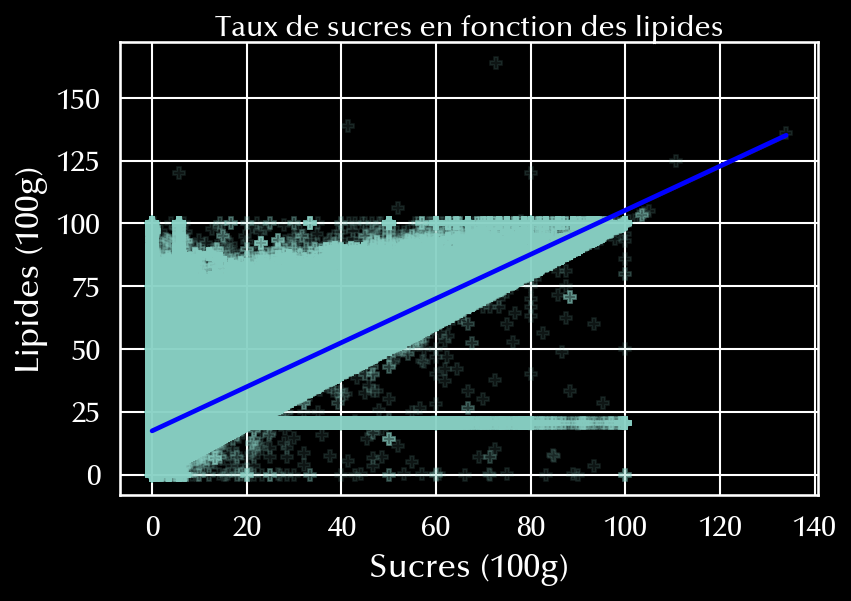

In [94]:
plt.title("Taux de sucres en fonction des lipides", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)

ax = sns.regplot(x="sugars_100g", y="carbohydrates_100g", data=df, line_kws={"color":"blue"},scatter_kws={"alpha":0.1}, marker='P', )
plt.xlabel("Sucres (100g)", fontproperties=prop, size = 16)
plt.ylabel("Lipides (100g)", fontproperties=prop, size = 16)

plt.show()

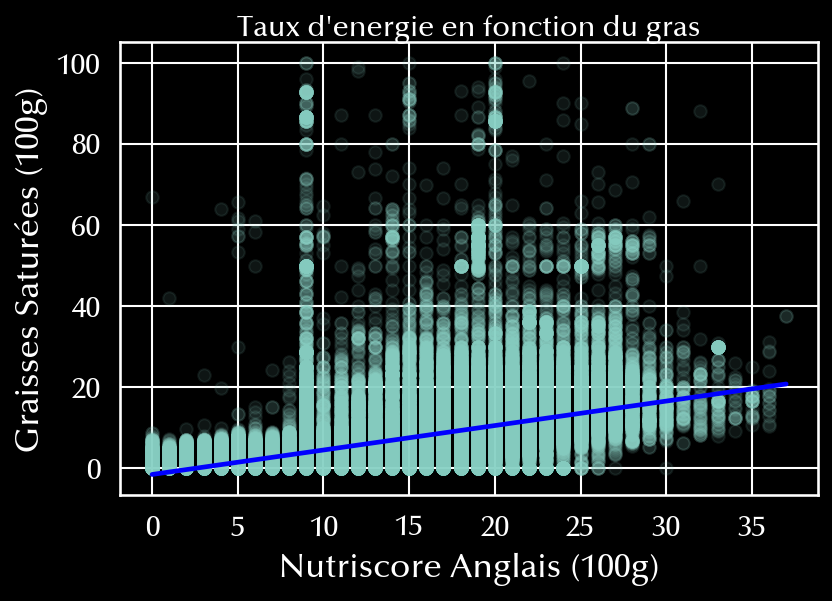

In [100]:
plt.title("Taux d'energie en fonction du gras", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)

ax = sns.regplot(x="nutrition-score-uk_100g", y="saturated-fat_100g", data=df, line_kws={"color":"blue"},scatter_kws={"alpha":0.1}, marker='o', )
plt.xlabel("Nutriscore Anglais (100g)", fontproperties=prop, size = 16)
plt.ylabel("Graisses Saturées (100g)", fontproperties=prop, size = 16)
# ax.yaxis.labelpad = 200

plt.show()

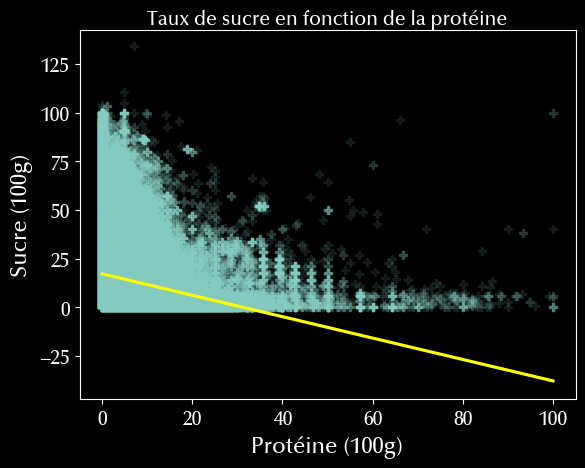

In [83]:
plt.title("Taux de sucre en fonction de la protéine", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
sns.regplot(x="proteins_100g", y="sugars_100g", data=df, line_kws={"color":"yellow"},scatter_kws={"alpha":0.1}, marker='P', )
plt.xlabel("Protéine (100g)", fontproperties=prop, size = 16)
plt.ylabel("Sucre (100g)", fontproperties=prop, size = 16)
plt.show()

# ANOVA

In [39]:
def anova()
# diviser les données en groupes en fonction de la variable qualitative
groupe_a = df[df['nutrition_grade_fr'] == 'a']['proteins_100g']
groupe_b = df[df['nutrition_grade_fr'] == 'b']['proteins_100g']
groupe_c = df[df['nutrition_grade_fr'] == 'c']['proteins_100g']
groupe_d = df[df['nutrition_grade_fr'] == 'd']['proteins_100g']
groupe_e = df[df['nutrition_grade_fr'] == 'e']['proteins_100g']

# effectuer une ANOVA
resultat_anova = f_oneway(groupe_a, groupe_b, groupe_c, groupe_d, groupe_e)

# afficher les résultats
print(resultat_anova)

F_onewayResult(statistic=2625.433862200737, pvalue=0.0)


In [40]:
def anova(data, variable_qualitative):
    # liste des variables quantitatives
    variables_quantitatives = list(data.select_dtypes(include=['float64', 'int64']).columns)

    # dictionnaire pour stocker les résultats de l'ANOVA pour chaque variable quantitative
    anova_results = {}

    # boucle pour effectuer l'ANOVA pour chaque variable quantitative
    for var in variables_quantitatives:
        # diviser les données en groupes en fonction de la variable qualitative
        groupes = [data[data[variable_qualitative] == g][var] for g in data[variable_qualitative].unique()]

        # effectuer l'ANOVA
        resultat_anova = f_oneway(*groupes)

        # stocker les résultats dans le dictionnaire
        anova_results[var] = {"statistique": resultat_anova.statistic, "p_value": resultat_anova.pvalue}

    # retourner le dictionnaire avec les résultats de l'ANOVA
    return anova_results

In [41]:
resultats_anova = anova(df, "nutrition_grade_fr")

# afficher les résultats de l'ANOVA pour chaque variable quantitative
for var in resultats_anova:
    print("Variable quantitative : ", var)
    print("Statistique F : ", resultats_anova[var]["statistique"])
    print("p-value : ", resultats_anova[var]["p_value"])
    print("---------------------------")

Variable quantitative :  nutrition-score-uk_100g
Statistique F :  337197.4387495312
p-value :  0.0
---------------------------
Variable quantitative :  energy_100g
Statistique F :  27168.86704338987
p-value :  0.0
---------------------------
Variable quantitative :  fiber_100g
Statistique F :  4852.489219191487
p-value :  0.0
---------------------------
Variable quantitative :  proteins_100g
Statistique F :  2625.4338622007385
p-value :  0.0
---------------------------
Variable quantitative :  carbohydrates_100g
Statistique F :  3203.6929934811556
p-value :  0.0
---------------------------
Variable quantitative :  sodium_100g
Statistique F :  657.32220442777
p-value :  0.0
---------------------------
Variable quantitative :  saturated-fat_100g
Statistique F :  42458.60373264301
p-value :  0.0
---------------------------
Variable quantitative :  fat_100g
Statistique F :  16492.28302041635
p-value :  0.0
---------------------------
Variable quantitative :  sugars_100g
Statistique F :  10

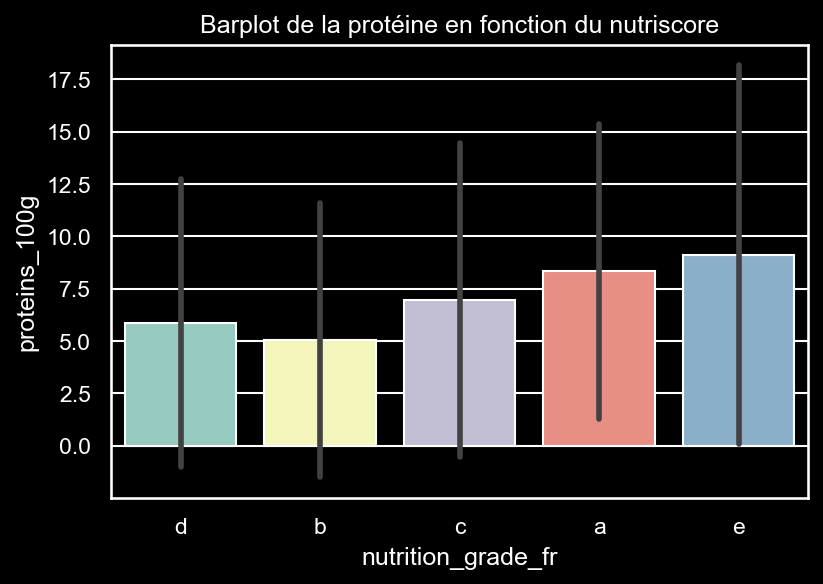

In [85]:
sns.barplot(x='nutrition_grade_fr', y='proteins_100g', data=df, ci='sd')
plt.title('Barplot de la protéine en fonction du nutriscore')
plt.show()

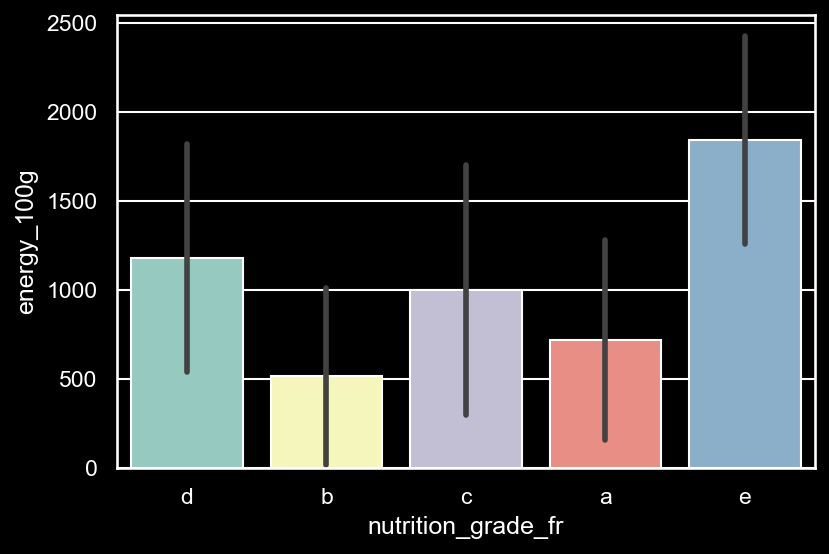

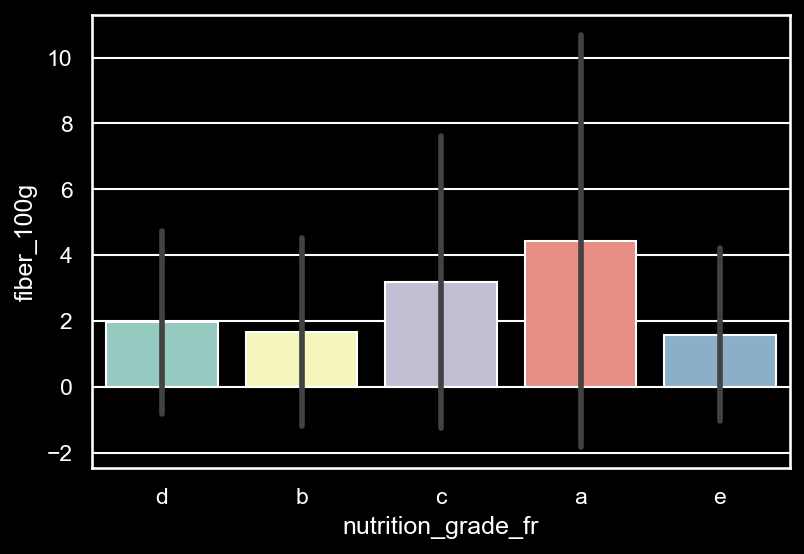

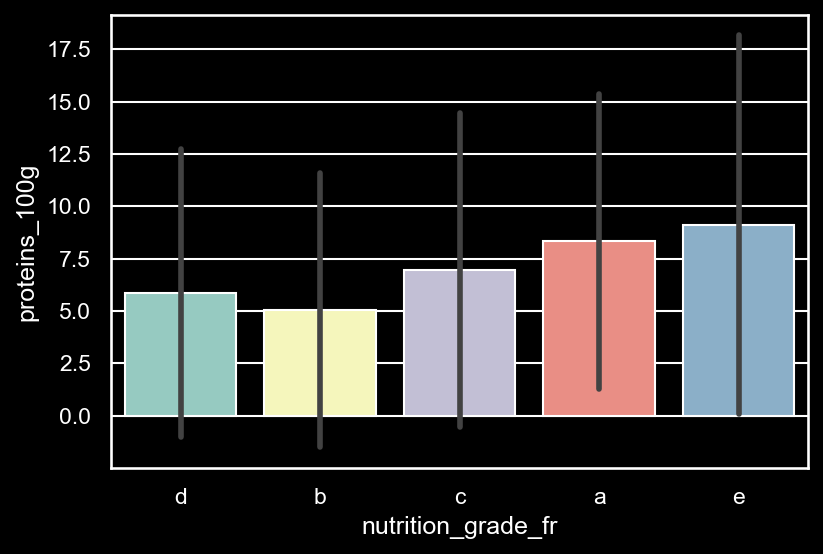

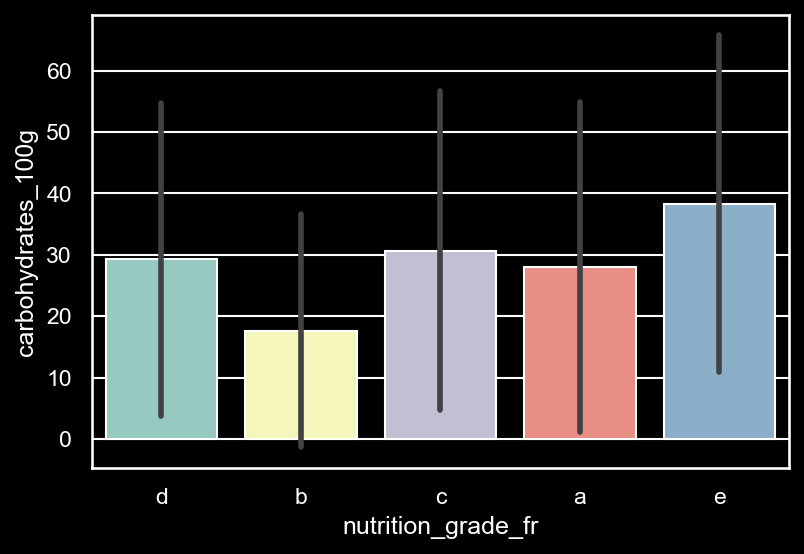

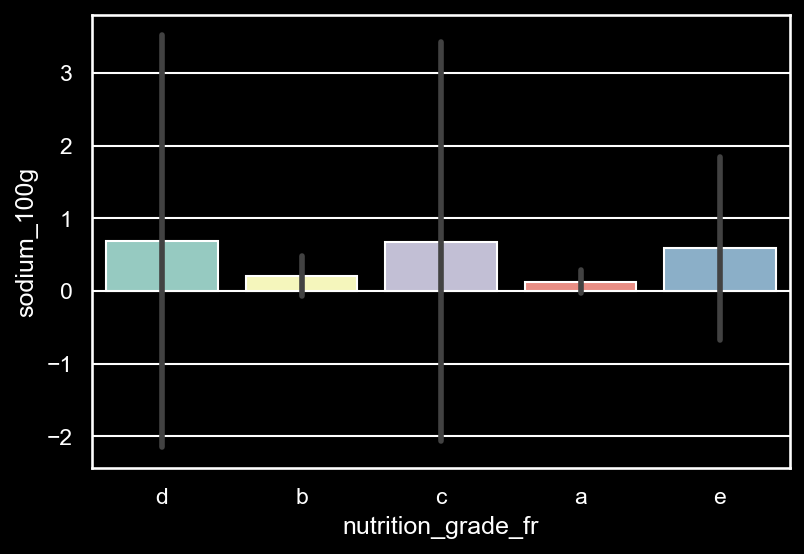

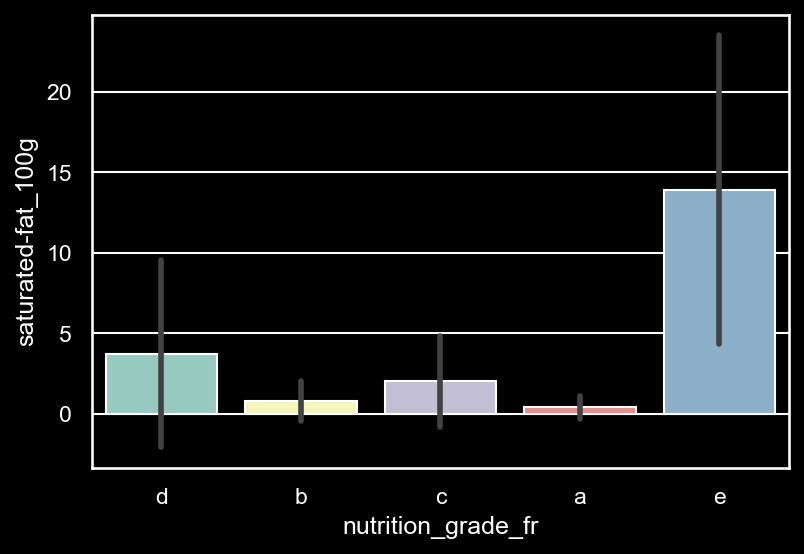

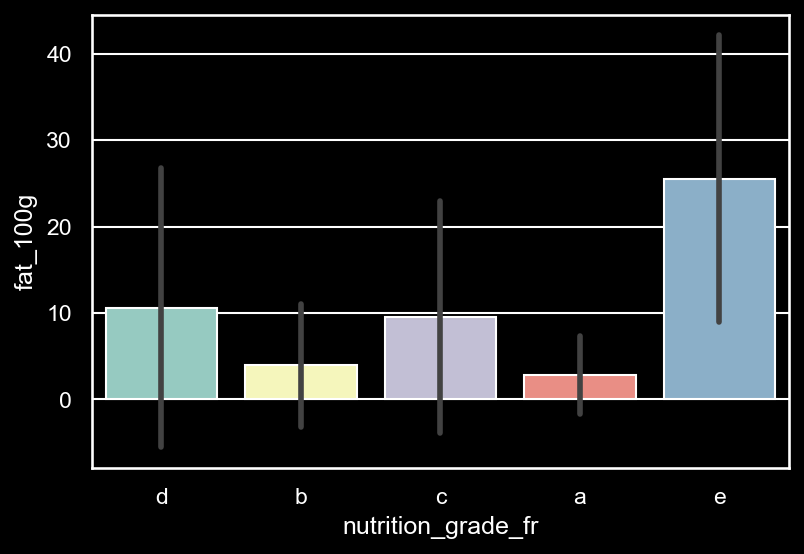

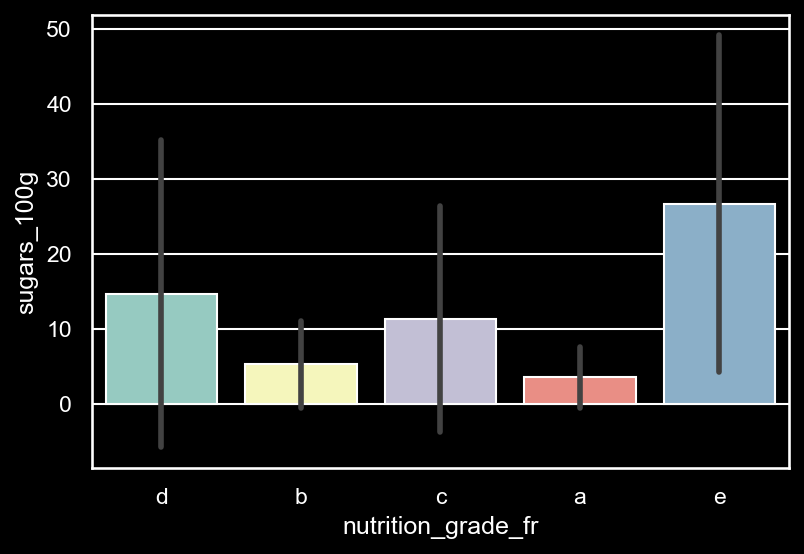

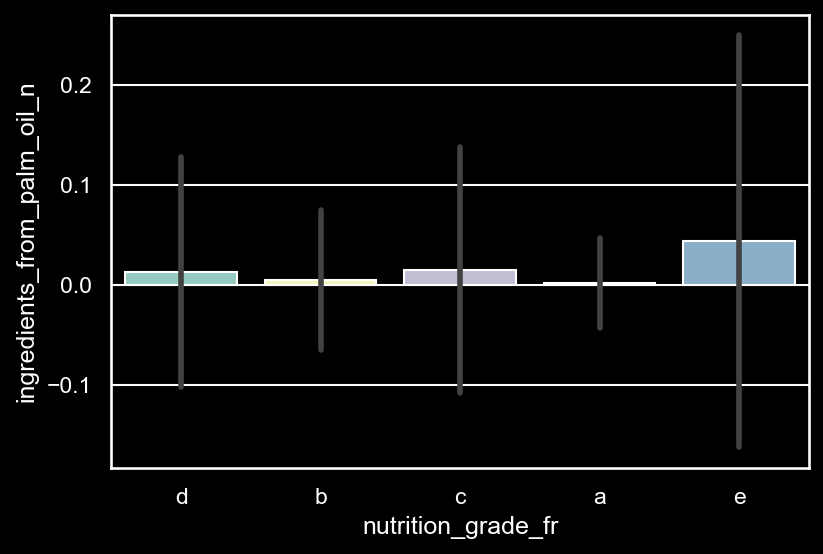

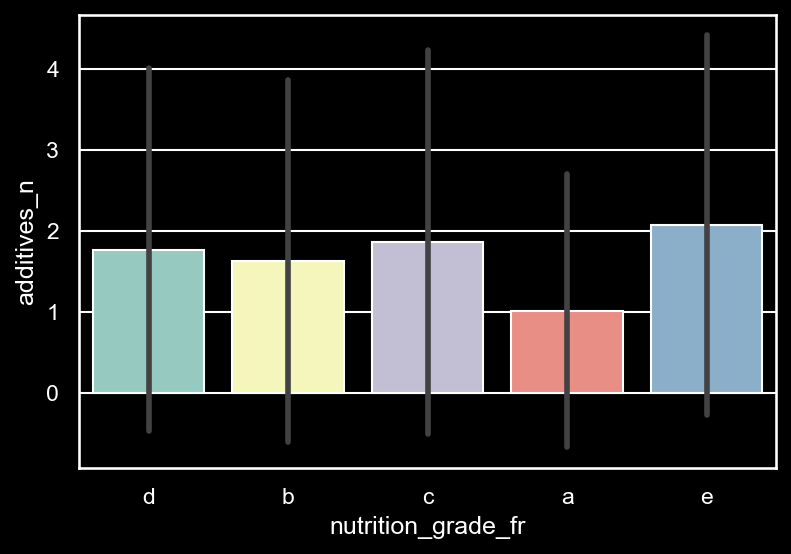

In [46]:
list_columns = ['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g','ingredients_from_palm_oil_n','additives_n']
  
for columns_name in list_columns:
    sns.barplot(x='nutrition_grade_fr', y=df[columns_name], data=df, ci='sd')
    plt.show()

# ACP

In [18]:
# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quanti)

# Créer un objet PCA avec le nombre de composantes souhaité
pca = PCA(n_components=2)

# Appliquer la PCA au dataframe normalisé
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

# Afficher le résultat sous forme d'un nouveau dataframe
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
print(df_pca)

             PC1       PC2
0      -0.643423 -0.255978
1       3.400423 -0.377132
2       1.575655  0.093525
3       3.011351 -2.164862
4       0.545794  0.751058
...          ...       ...
320536 -0.643423 -0.255978
320537 -2.306572 -0.679458
320538 -0.643423 -0.255978
320539 -0.643423 -0.255978
320540 -0.399327  0.301179

[320541 rows x 2 columns]


In [29]:
X = df_quanti.values
names = df_quanti.index
features = df_quanti.columns

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 10

# Créer un objet PCA avec le nombre de composantes souhaité
pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=10)

In [20]:
# retourne le pourcentage de la variance totale des données 
# qui est expliqué par chaque composante principale.
pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree

array([25.96, 18.62, 12.12, 10.34,  9.76,  8.49,  6.55,  4.37,  2.9 ,
        0.89])

In [21]:
# on arrondit à la somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 26.,  45.,  57.,  67.,  77.,  85.,  92.,  96.,  99., 100.])

In [22]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

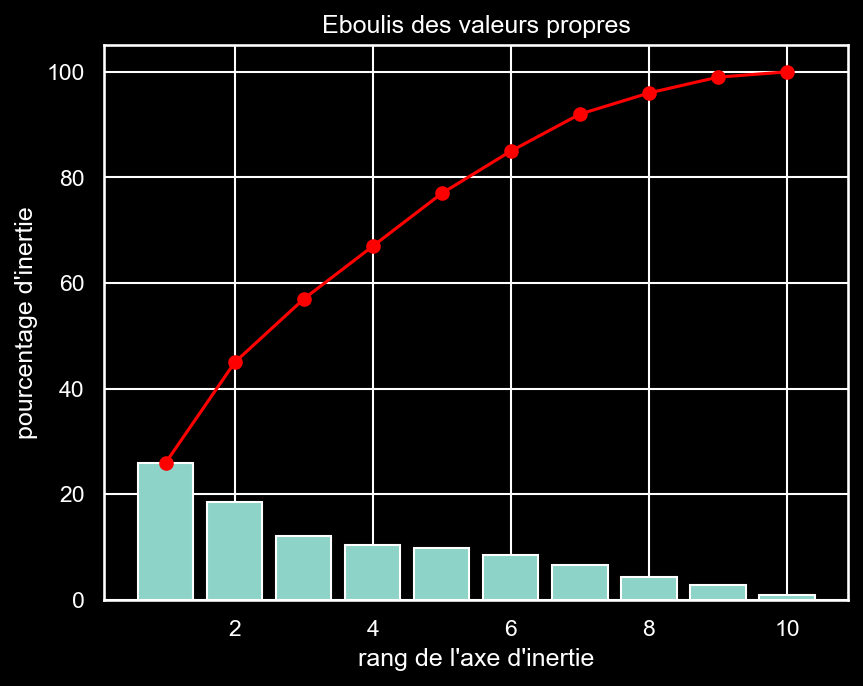

In [23]:
# Ce code permet de créer un scree plot pour visualiser les pourcentages 
# de variance expliquée pour chaque composante principale, ainsi que la 
# variance cumulée expliquée par chaque composante.

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [24]:
pcs = pca.components_
pcs

array([[ 0.57987285,  0.200962  ,  0.21621657,  0.27391927, -0.07022261,
         0.44381545,  0.4898325 ,  0.22277953,  0.10034088,  0.00649026],
       [ 0.02597774, -0.00205815, -0.33610767,  0.56579862, -0.06952498,
        -0.21856635, -0.29311307,  0.56789667,  0.10186912,  0.30792902],
       [ 0.02188867,  0.68127504,  0.33749881,  0.24457593, -0.03672621,
        -0.33565869, -0.20585824, -0.0457369 , -0.29859822, -0.33766318],
       [-0.04710737,  0.25700416,  0.30976696,  0.0123903 ,  0.46154198,
        -0.10749513, -0.08235427, -0.18470457,  0.64095275,  0.39915665],
       [ 0.04867395, -0.07016087, -0.15383265,  0.07111544,  0.87858801,
         0.09097978,  0.05008376,  0.15336971, -0.36599269, -0.15430779],
       [ 0.02008749, -0.08592844,  0.36310633, -0.00600905, -0.04463218,
        -0.00281165, -0.00566145, -0.07618913, -0.57856131,  0.71955578],
       [-0.04375079,  0.5786408 , -0.65603177, -0.15630301, -0.02647788,
         0.08149855,  0.23188322, -0.22287241

In [25]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9
0,0.579873,0.200962,0.216217,0.273919,-0.070223,0.443815,0.489833,0.222780,0.100341,0.006490
1,0.025978,-0.002058,-0.336108,0.565799,-0.069525,-0.218566,-0.293113,0.567897,0.101869,0.307929
2,0.021889,0.681275,0.337499,0.244576,-0.036726,-0.335659,-0.205858,-0.045737,-0.298598,-0.337663
3,-0.047107,0.257004,0.309767,0.012390,0.461542,-0.107495,-0.082354,-0.184705,0.640953,0.399157
4,0.048674,-0.070161,-0.153833,0.071115,0.878588,0.090980,0.050084,0.153370,-0.365993,-0.154308
5,0.020087,-0.085928,0.363106,-0.006009,-0.044632,-0.002812,-0.005661,-0.076189,-0.578561,0.719556
6,-0.043751,0.578641,-0.656032,-0.156303,-0.026478,0.081499,0.231883,-0.222872,-0.101027,0.295738
7,-0.413843,0.266890,0.147836,-0.230147,-0.030450,0.639523,-0.325246,0.408579,-0.002940,0.005850
8,0.062389,-0.097292,-0.111998,0.505505,-0.010731,0.454660,-0.408638,-0.585379,-0.025893,-0.037527
9,-0.693202,-0.039949,0.100666,0.454799,-0.014590,0.020060,0.543975,-0.055232,-0.001894,-0.036337


In [26]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fiber_100g,proteins_100g,carbohydrates_100g,sodium_100g,saturated-fat_100g,fat_100g,sugars_100g,ingredients_from_palm_oil_n,additives_n
F1,0.58,0.20,0.22,0.27,-0.07,0.44,0.49,0.22,0.10,0.01
F2,0.03,-0.00,-0.34,0.57,-0.07,-0.22,-0.29,0.57,0.10,0.31
F3,0.02,0.68,0.34,0.24,-0.04,-0.34,-0.21,-0.05,-0.30,-0.34
F4,-0.05,0.26,0.31,0.01,0.46,-0.11,-0.08,-0.18,0.64,0.40
F5,0.05,-0.07,-0.15,0.07,0.88,0.09,0.05,0.15,-0.37,-0.15
F6,0.02,-0.09,0.36,-0.01,-0.04,-0.00,-0.01,-0.08,-0.58,0.72
F7,-0.04,0.58,-0.66,-0.16,-0.03,0.08,0.23,-0.22,-0.10,0.30
F8,-0.41,0.27,0.15,-0.23,-0.03,0.64,-0.33,0.41,-0.00,0.01
F9,0.06,-0.10,-0.11,0.51,-0.01,0.45,-0.41,-0.59,-0.03,-0.04
F10,-0.69,-0.04,0.10,0.45,-0.01,0.02,0.54,-0.06,-0.00,-0.04


<AxesSubplot:>

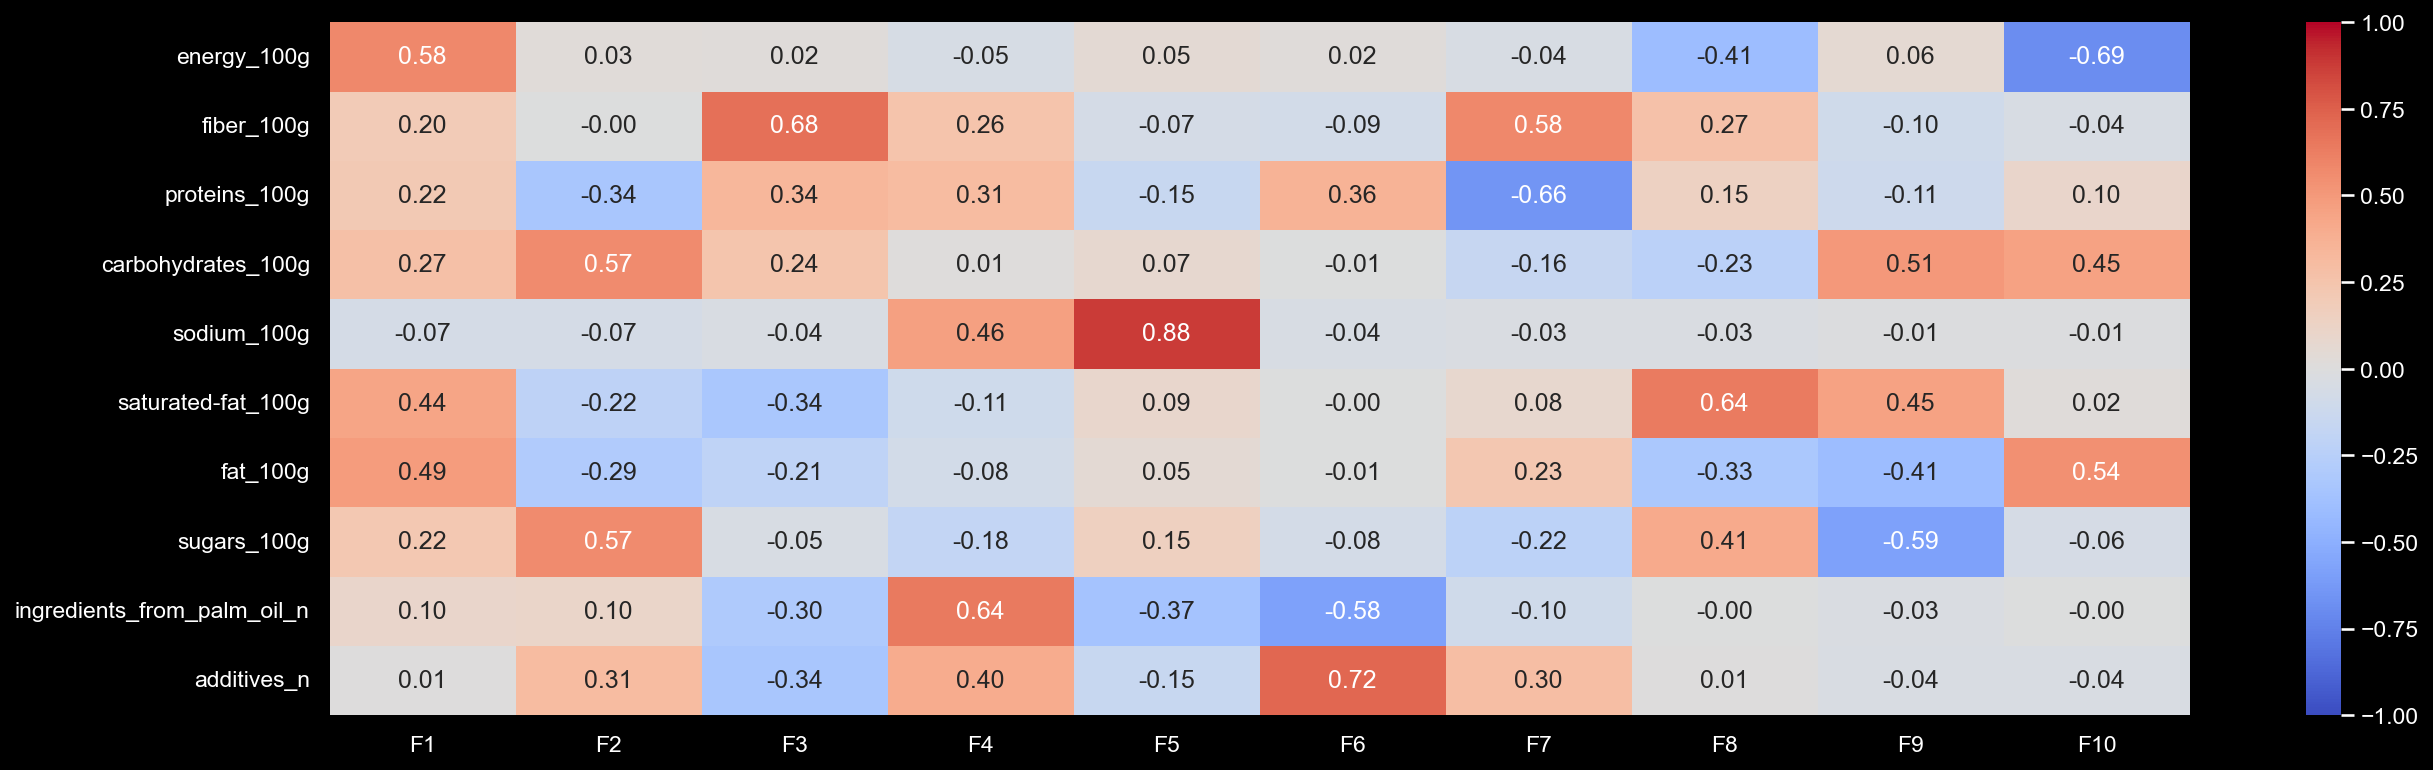

In [27]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

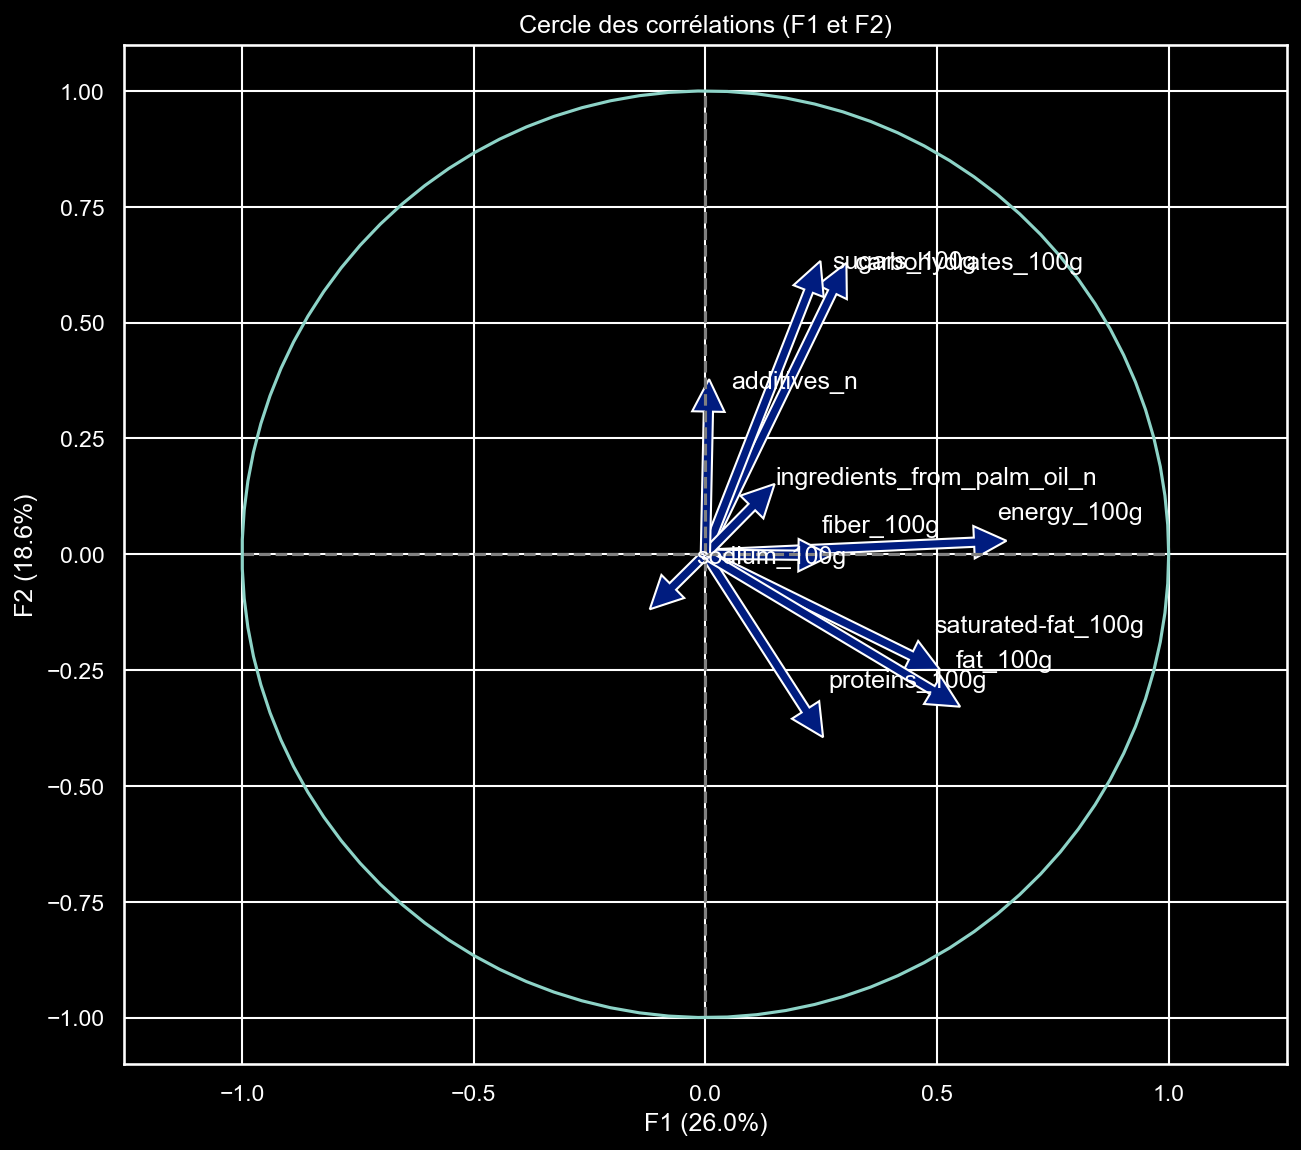

In [86]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

rajouter analyse, conclusions

addtives et energy pas correlée car angle droit
sodium et huile de palme correlée négativement

Faire une analyse quali / quali

<AxesSubplot:>

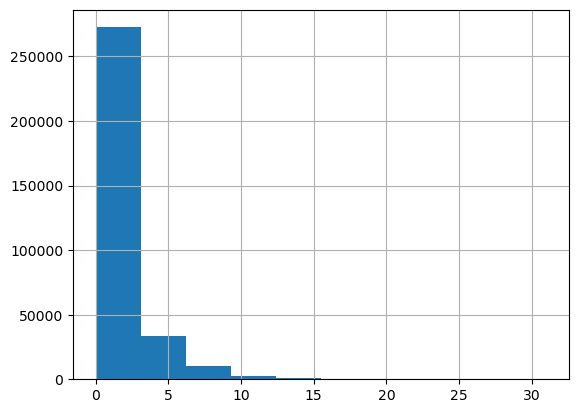

In [6]:
df["additives_n"].hist()

rajouter des conditions if pour transformer les variables qualitatives en catégories (ex: moins de 3 additifs = low additifs) etc

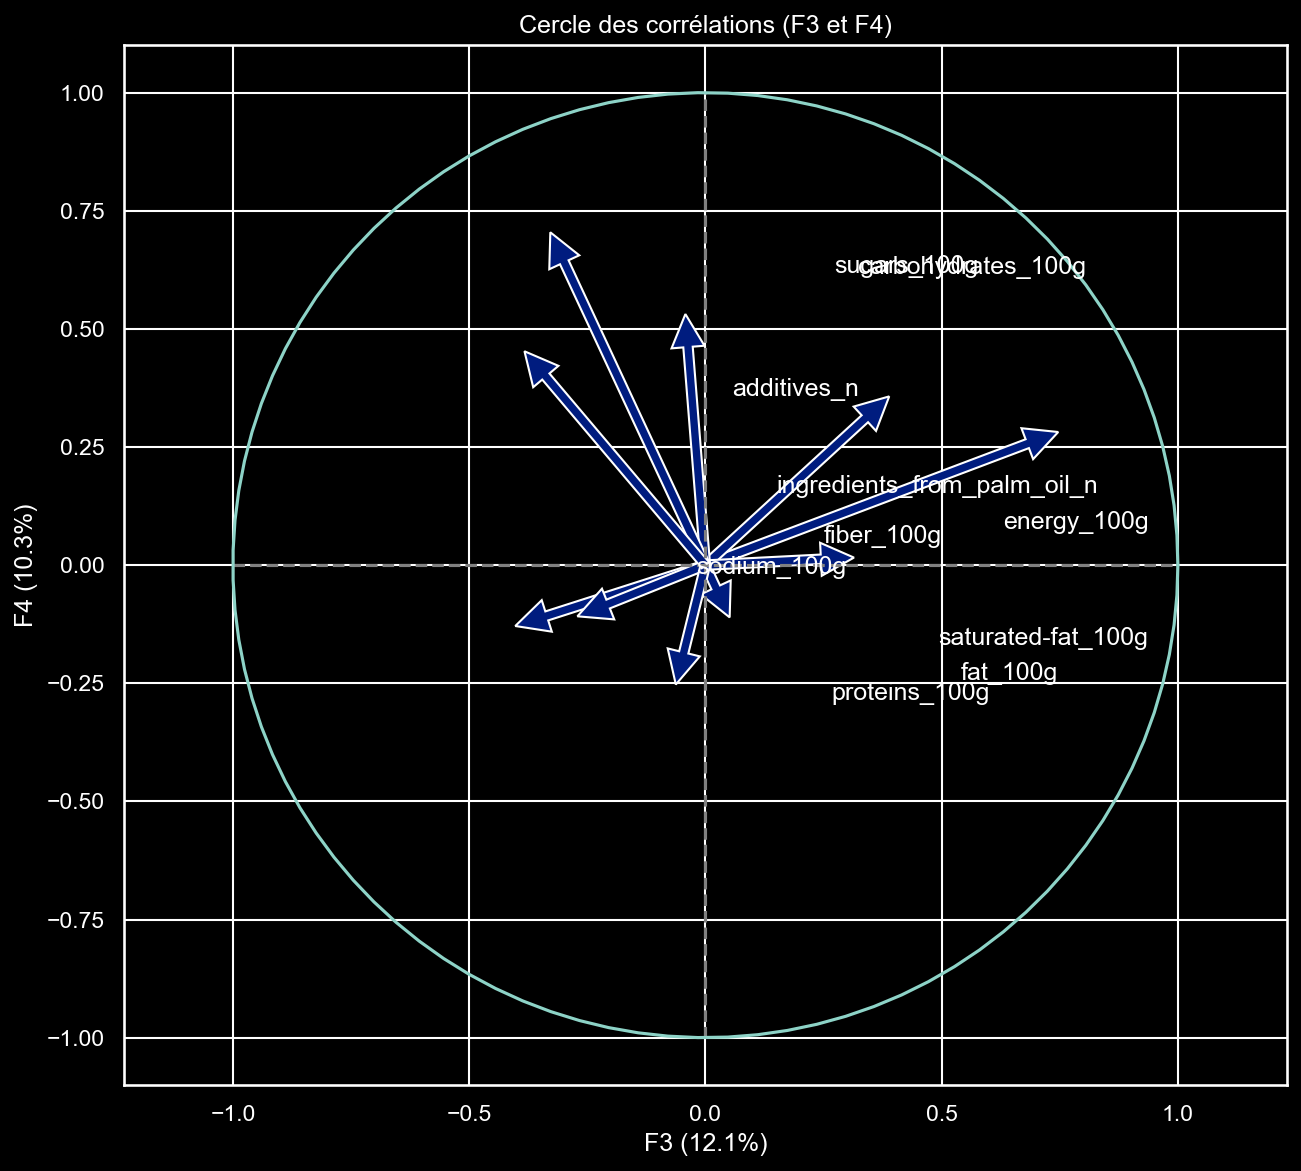

In [31]:
x,y = 2,3
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC1
             pca.components_[3, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

- faire une regression linéaire entre le nutriscore et le reste
- exemple avec energy, pour faire le lien

- faire une moyenne pondérée des aliments
- utiliser l'étude